In [1]:
import numpy as np
from scipy import sparse
import matplotlib.pylab as plt
from scipy.io import loadmat
import tensor
%matplotlib inline

In [2]:
U=tensor.randomortho(50,10)

In [6]:
X0=np.dot(U.reshape((50,1,1,10)) * U.reshape((50,1,10)) * U, range(1,11))
Y=X0 # +1.0/np.sqrt(50)*np.random.randn(50,50,50) # (noise)

In [7]:
# Power method
X=Y
Uhat=[]
vals=[]
for rr in range(10):
    uu=np.random.randn(50); uu=uu/np.linalg.norm(uu)
    for kk in range(50):
        unew = ((X * uu).sum(2) * uu).sum(1);
        val=np.linalg.norm(unew)
        unew = unew/val
        res  = 1-np.dot(unew.T,uu)
        print 'kk=%d, val=%g res=%g' % (kk, val, res)
        uu=unew
        if res<1e-6:
            break
    Uhat.append(uu)
    vals.append(val)
    X=X-val* tensor.outer((uu,uu,uu))
    print ' norm(X)=%g' % (np.linalg.norm(X.ravel()))


kk=0, val=0.240605 res=1.06508
kk=1, val=3.69972 res=0.125809
kk=2, val=7.46225 res=0.0654254
kk=3, val=8.96107 res=0.00207202
kk=4, val=8.99998 res=1.03339e-06
kk=5, val=9 res=2.3781e-13
 norm(X)=17.4356
kk=0, val=0.3134 res=1.06163
kk=1, val=4.01893 res=0.0897959
kk=2, val=7.09811 res=0.0826089
kk=3, val=9.68313 res=0.0133757
kk=4, val=9.99751 res=0.000122542
kk=5, val=10 res=7.72184e-09
 norm(X)=14.2829
kk=0, val=0.390427 res=0.859562
kk=1, val=5.24766 res=0.0411606
kk=2, val=5.95104 res=0.00351829
kk=3, val=5.99973 res=2.23893e-05
kk=4, val=6 res=7.11018e-10
 norm(X)=12.9615
kk=0, val=0.630431 res=1.18871
kk=1, val=7.50559 res=0.0285436
kk=2, val=7.9985 res=9.27433e-05
kk=3, val=8 res=2.17298e-09
 norm(X)=10.198
kk=0, val=0.157358 res=0.90371
kk=1, val=6.46773 res=0.0322995
kk=2, val=6.99498 res=0.000351037
kk=3, val=7 res=4.05486e-08
 norm(X)=7.4162
kk=0, val=0.241402 res=1.29891
kk=1, val=4.02513 res=0.0699819
kk=2, val=4.96357 res=0.00343141
kk=3, val=4.99997 res=3.42536e-06
kk=

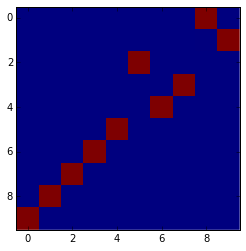

In [8]:
import matplotlib.pylab as plt
plt.imshow(np.dot(np.array(Uhat), U),interpolation='none')

In [9]:
vals

[8.9999999999957225,
 9.999999845543952,
 5.9999999914672442,
 7.9999999652305487,
 6.9999994321837535,
 4.9999999999698463,
 3.9999999957914216,
 2.999999999814293,
 1.9999999999576568,
 0.99999999999953748]